In [1]:
# Creating a new column called 'SENTIMENT' that contains the sentiment scores of each review using nltk
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd

In [2]:
df =pd.read_csv('C:/Users/Admin/Desktop/BA Project/data/BA_reviews.csv')

In [3]:
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | Regarding the aircraft and seat...
1,1,Not Verified | I travelled with British Airway...
2,2,Not Verified | Food was lousy. Who ever is pl...
3,3,✅ Trip Verified | Had the worst experience. Th...
4,4,✅ Trip Verified | The ground staff were not h...


In [4]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
df['SENTIMENT'] = df['reviews'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
df

,Unnamed: 0,reviews,SENTIMENT
0,0,Not Verified | Regarding the aircraft and seat...,-0.4541
1,1,Not Verified | I travelled with British Airway...,-0.9455
2,2,Not Verified | Food was lousy. Who ever is pl...,-0.7476
3,3,✅ Trip Verified | Had the worst experience. Th...,-0.8604
4,4,✅ Trip Verified | The ground staff were not h...,-0.8537
...,...,...,...
995,995,✅ Trip Verified | Mumbai to Edinburgh via Lon...,0.9903
996,996,✅ Trip Verified | Mumbai to London Heathrow. ...,0.9773
997,997,✅ Trip Verified | Delhi to London. Having rea...,0.9878
998,998,✅ Trip Verified | When you travel British Airw...,0.9288


In [6]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
df['SENTIMENT_TYPE'] = df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
df


,Unnamed: 0,reviews,SENTIMENT,SENTIMENT_TYPE
0,0,Not Verified | Regarding the aircraft and seat...,-0.4541,negative
1,1,Not Verified | I travelled with British Airway...,-0.9455,negative
2,2,Not Verified | Food was lousy. Who ever is pl...,-0.7476,negative
3,3,✅ Trip Verified | Had the worst experience. Th...,-0.8604,negative
4,4,✅ Trip Verified | The ground staff were not h...,-0.8537,negative
...,...,...,...,...
995,995,✅ Trip Verified | Mumbai to Edinburgh via Lon...,0.9903,positive
996,996,✅ Trip Verified | Mumbai to London Heathrow. ...,0.9773,positive
997,997,✅ Trip Verified | Delhi to London. Having rea...,0.9878,positive
998,998,✅ Trip Verified | When you travel British Airw...,0.9288,positive


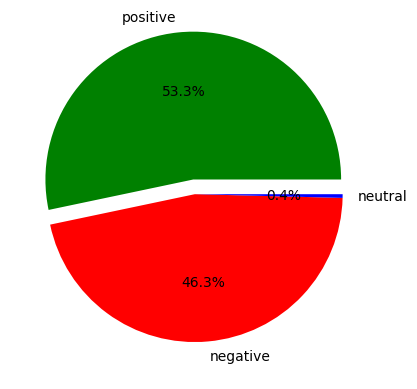

In [9]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'blue'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

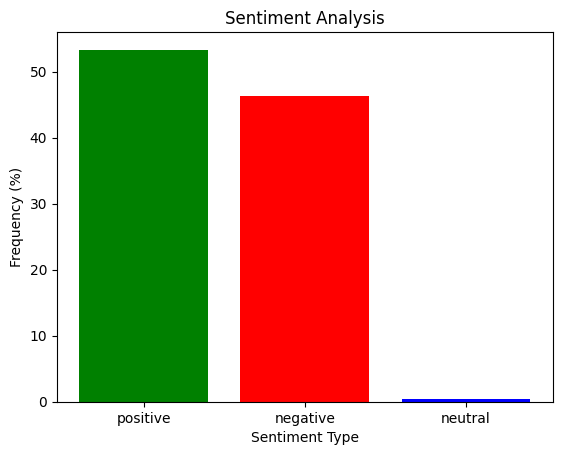

In [10]:


# calculate the percentage of each type of sentiment score
sentiment_type_percentages = df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the bar chart
fig, ax = plt.subplots()
ax.bar(
    sentiment_type_percentages.index, 
    sentiment_type_percentages.values, 
    color=['green', 'red', 'blue']
    )

# set chart title and axis labels
ax.set_title('Sentiment Analysis')
ax.set_xlabel('Sentiment Type')
ax.set_ylabel('Frequency (%)')

plt.show()

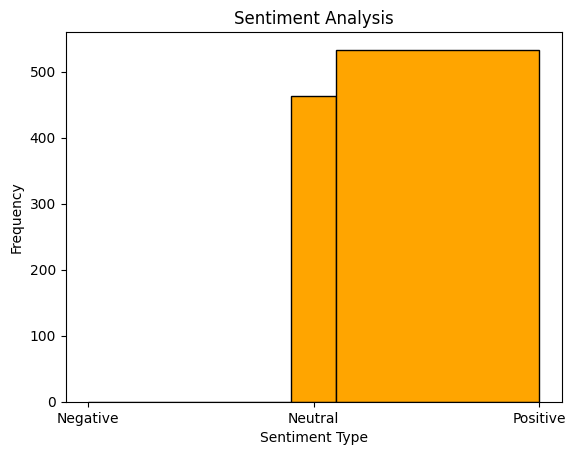

In [11]:
# create the frequency chart
fig, ax = plt.subplots()
ax.hist(
    df['SENTIMENT_TYPE'], 
    bins=[-1, -0.1, 0.1, 1], 
    color=['orange'],
    edgecolor='black'
    )

# set chart title and axis labels
ax.set_title('Sentiment Analysis')
ax.set_xlabel('Sentiment Type')
ax.set_ylabel('Frequency')

# set x-axis tick labels
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

plt.show()


Sentiment
Out of 1000 reviews, 533 were positive, 463 were negative and 4 were neutral. This means the majority of reviews were
polarised as either positive or negative

In [13]:
#Saving the new data into a csv
df.to_csv(r"C:/Users/Admin/Desktop/BA Project/data/Cleaned_BA_reviews.csv")

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


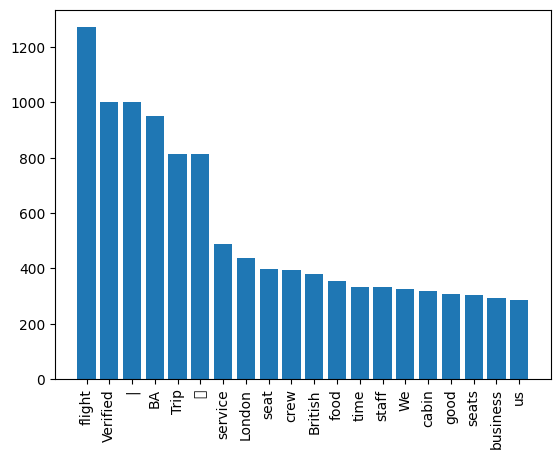

In [12]:
# The frequency chart shows the key topics within the 
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = df['reviews']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

Key topics

The frequency chart below shows that the key topics within the reviews include “flight”, “London”, “service” and “crew”, showing that 
people are actively talking about their experience and staff